Resumen guardado en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/resumen_proporciones.xlsx
Gráfico guardado en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/grafico_proporciones.png


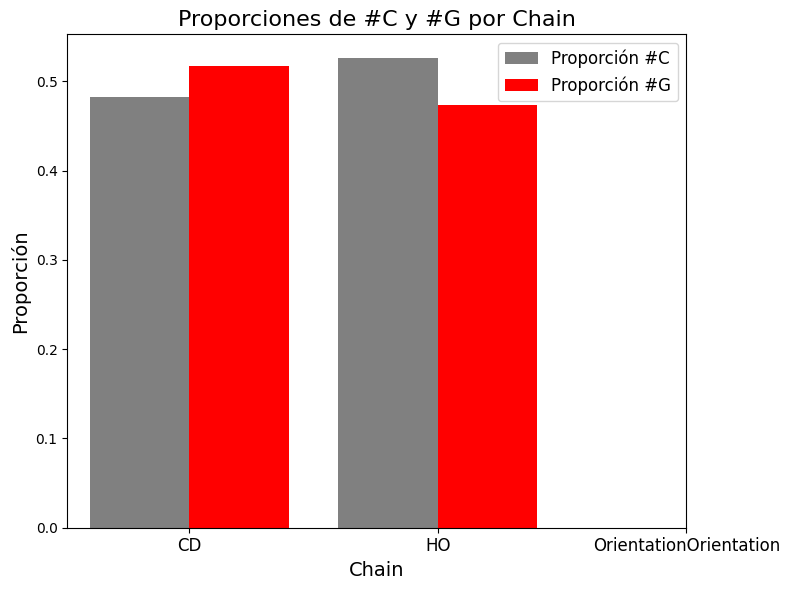

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def procesar_archivo_proporciones(ruta_entrada, ruta_salida_excel, ruta_salida_grafico):
    """
    Lee un archivo (Excel, CSV o MOCHI) con columnas:
      - OrientationOrientation (valores "CD" u "HO")
      - #C
      - #G

    Para cada fila, calcula la proporción de #C y #G (es decir, #C/(#C+#G) y #G/(#C+#G)).
    Luego agrupa por OrientationOrientation y obtiene el promedio de dichas proporciones
    en cada grupo.

    Genera un resumen con las columnas:
      Chain, proportion #C, proportion #G
    (donde Chain es la orientación "CD" u "HO").

    Guarda el resumen en un Excel y crea un gráfico de barras (basado en el resumen) 
    comparando proportion #C vs proportion #G para cada Chain.
    """

    # 1. Detectar la extensión y leer el archivo
    extension = os.path.splitext(ruta_entrada)[1].lower()
    if extension == ".csv":
        df = pd.read_csv(ruta_entrada)
    elif extension == ".mochi":
        df = pd.read_csv(ruta_entrada, sep='\t')
    else:
        df = pd.read_excel(ruta_entrada)
    
    # 2. Quitar espacios en blanco en los nombres de columnas (por si acaso)
    df.columns = df.columns.str.strip()
    
    # 3. Verificar que existan las columnas requeridas
    columnas_necesarias = ["OrientationOrientation", "#C", "#G"]
    for col in columnas_necesarias:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no se encontró en el archivo.")
            return

    # 3.1 Convertir columnas '#C' y '#G' a numéricas
    df["#C"] = pd.to_numeric(df["#C"], errors="coerce")
    df["#G"] = pd.to_numeric(df["#G"], errors="coerce")
    
    # 4. Calcular proporciones por fila: #C/(#C + #G) y #G/(#C + #G)
    df["propC"] = df["#C"] / (df["#C"] + df["#G"])
    df["propG"] = df["#G"] / (df["#C"] + df["#G"])
    
    # 5. Agrupar por OrientationOrientation y calcular el promedio de propC y propG
    resumen = df.groupby("OrientationOrientation").agg(
        **{
            "proportion #C": ("propC", "mean"),
            "proportion #G": ("propG", "mean")
        }
    ).reset_index()
    
    # 6. Renombrar OrientationOrientation a "Chain" para el resumen final
    resumen.rename(columns={"OrientationOrientation": "Chain"}, inplace=True)
    
    # 7. Guardar el resumen en un archivo Excel
    resumen.to_excel(ruta_salida_excel, index=False)
    print("Resumen guardado en:", ruta_salida_excel)
    
    # 8. Graficar las proporciones (basado en el resumen)
    x = range(len(resumen))
    width = 0.4  # Ancho de cada barra

    plt.figure(figsize=(8, 6))

    # Barras para proportion #C
    plt.bar(
        [i - width/2 for i in x],
        resumen["proportion #C"],
        width=width,
        color="gray",
        label="Proporción #C"
    )

    # Barras para proportion #G
    plt.bar(
        [i + width/2 for i in x],
        resumen["proportion #G"],
        width=width,
        color="red",
        label="Proporción #G"
    )
    
    # Eje X con las etiquetas de cada Chain
    plt.xticks(list(x), resumen["Chain"], fontsize=12)
    plt.xlabel("Chain", fontsize=14)
    plt.ylabel("Proporción", fontsize=14)
    plt.title("Proporciones de #C y #G por Chain", fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()
    
    # Guardar y mostrar el gráfico
    plt.savefig(ruta_salida_grafico, dpi=300)
    print("Gráfico guardado en:", ruta_salida_grafico)
    plt.show()

# -------------------------------------------------------------------------
# Uso de la función
# -------------------------------------------------------------------------
if __name__ == "__main__":
    # Ejemplo de rutas (cámbialas según tus archivos y carpeta de trabajo)
    archivo_entrada = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/1331_GC.mochi"
    archivo_salida_excel = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/resumen_proporciones.xlsx"
    archivo_salida_grafico = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/grafico_proporciones.png"

    procesar_archivo_proporciones(
        ruta_entrada=archivo_entrada,
        ruta_salida_excel=archivo_salida_excel,
        ruta_salida_grafico=archivo_salida_grafico
    )
